In [54]:
import pandas as pd
import os

base = 'F:/data/Gland-Segmentation-main/Gland-Segmentation-main'
data_dir = 'data.csv'
data = pd.read_csv(os.path.join(base,data_dir))
data.head()

,name,patient ID,grade (GlaS),grade (Sirinukunwattana et al. 2015),fold,image_height,image_width,img_npy,anno_npy
0,testA_1,4,benign,adenomatous,1,522,775,img_npy/testA_1.npy,img_npy/testA_1_anno.npy
1,testA_10,10,benign,healthy,1,522,775,img_npy/testA_10.npy,img_npy/testA_10_anno.npy
2,testA_11,9,benign,healthy,1,522,775,img_npy/testA_11.npy,img_npy/testA_11_anno.npy
3,testA_12,11,malignant,poorly differentiated,1,522,775,img_npy/testA_12.npy,img_npy/testA_12_anno.npy
4,testA_13,7,malignant,moderately differentiated,1,522,775,img_npy/testA_13.npy,img_npy/testA_13_anno.npy


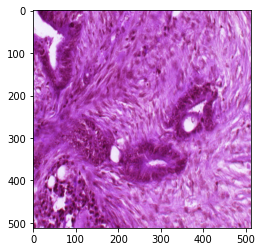

In [55]:
import numpy as np
import matplotlib.pyplot as plt

img_dir = data.iloc[5,:]['img_npy']
anno_dir = data.iloc[5,:]['anno_npy']

img = np.load(os.path.join(base,img_dir))
anno = np.load(os.path.join(base, anno_dir))

plt.imshow(img/255.)
plt.show()

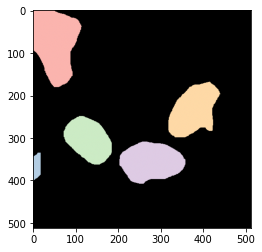

In [56]:
color_mask = np.zeros(anno.shape)
get_cmap = plt.cm.get_cmap('Pastel1')
np.max(anno)
for i in range((int)(np.max(anno))):
    # assign each value a diff color
    color_mask[anno[:, :, 0] == i + 1] = list(get_cmap(i))[:-1]
plt.imshow(color_mask)
plt.show()

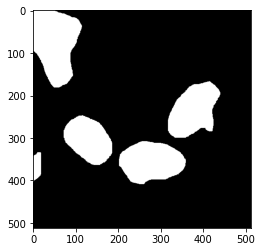

In [57]:
plt.imshow(np.where(anno>0, 1., 0.))
plt.show()

In [58]:
from skimage import color

def overlay_mask(image, mask, colors=[(0, 1.0, 0)],
                 alpha=0.12):
    """
    Helper function to plot overlay image segmentation of the original image
    @param image: input image
    @param mask: segmentation mask
    @param colors: color spectrum of type (R,G,B)
    @param alpha: masking opacity
    @return: overlay image
    """
    # normalize image
    if np.max(image)>1.0:
        image = image/255.0
    # gray scale image
    if mask.ndim is 3:
        mask = mask[:,:,0]
    #Return an RGB image where color-coded labels are painted over the image.
    mask_image = color.label2rgb(mask, image,
                             colors=colors, alpha=alpha,
                             bg_label = 0)
    return mask_image

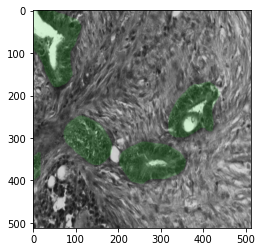

In [59]:
from skimage import segmentation
plt.imshow(overlay_mask(img,anno.astype(np.int_)))
plt.show()

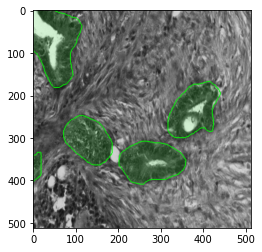

In [60]:
masked_img = overlay_mask(img,anno.astype(np.int_))
boundary_image=segmentation.mark_boundaries(masked_img, np.where(anno>0,1.,0.)[:,:,0],color=(0, 1.0, 0),mode='thick')
plt.imshow(boundary_image)
plt.show()